In [1]:
import pandas as pd
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

train_file = './files/train.csv'
df = pd.read_csv(train_file)
df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


In [2]:
def comprehensive_text_preprocessing(text):
    # Lowercase and remove HTML tags
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

    return " ".join(words)  # Return the processed text

In [3]:
# Applying the comprehensive_text_preprocessing to the 'full_text' column
df['processed_text'] = df['full_text'].apply(comprehensive_text_preprocessing)

In [22]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['pos'] > scores['neu'] and scores['pos'] > scores['neg']:
        sentiment = 'pos'
    elif scores['neg'] > scores['neu'] and scores['neg'] > scores['pos']:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    return sentiment
    
# apply get_sentiment function

df['sentiment'] = df['processed_text'].apply(get_sentiment)

{1: 2, 2: 26, 3: 9, 4: 2}
{1: 1250, 2: 4697, 3: 6271, 4: 3924, 5: 970, 6: 156}
[1, 2, 3, 4, 5, 6]


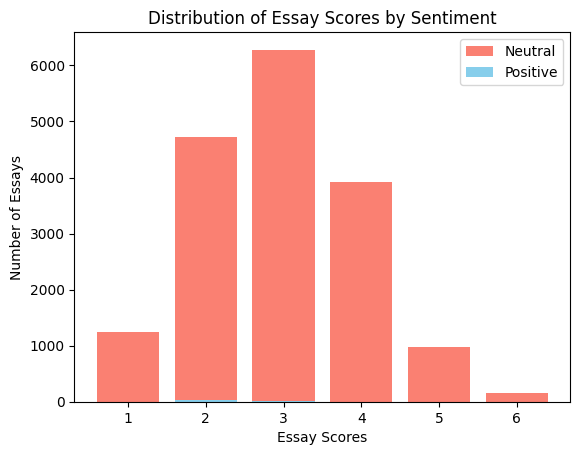

In [37]:
import matplotlib.pyplot as plt

positive_scores = [score for score, sentiment in zip(df['score'], df['sentiment']) if sentiment == 'pos']
negative_scores = [score for score, sentiment in zip(df['score'], df['sentiment']) if sentiment == 'neu']

# Count the occurrences of each score
positive_score_counts = {score: positive_scores.count(score) for score in set(positive_scores)}
negative_score_counts = {score: negative_scores.count(score) for score in set(negative_scores)}

print(positive_score_counts)
print(negative_score_counts)

# Get all unique scores
all_scores = sorted(set(positive_scores + negative_scores))

# Arrange counts by score
positive_counts = [positive_score_counts.get(score, 0) for score in all_scores]
negative_counts = [negative_score_counts.get(score, 0) for score in all_scores]

# Create bar graph
plt.bar(all_scores, negative_counts, color='salmon', label='Neutral', bottom=positive_counts)
plt.bar(all_scores, positive_counts, color='skyblue', label='Positive')

# Add labels and title
plt.xlabel('Essay Scores')
plt.ylabel('Number of Essays')
plt.title('Distribution of Essay Scores by Sentiment')
plt.legend()

# Show plot
plt.show()